In [1]:
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt

#### Define a simplified network topology inspired by Zahraa's Gridnet scenario.
#### The network is represented as an undirected graph with 6 infrastructure nodes.

In [2]:
#Create Graph 
G = nx.Graph()

In [3]:
#Create 6 nodes with attributes of capacity and state

nodes = {
    0: {"cpu": 100, "mem": 100, "active": False},
    1: {"cpu": 100, "mem": 100, "active": False},
    2: {"cpu": 100, "mem": 100, "active": False},
    3: {"cpu": 100, "mem": 100, "active": False},
    4: {"cpu": 100, "mem": 100, "active": False},
    5: {"cpu": 100, "mem": 100, "active": False}
}

# Each node has a fixed capacity of CPU and memory and is initially inactive.

In [4]:
#Add nodes to the graphic
for node, attrs in nodes.items():
    G.add_node(node, **attrs)

#### The topology includes 7 bidirectional links with fixed delay and bandwidth capacity.

In [5]:
#Defining enlaces 
edges = [
    (0, 1), (0, 2), (1, 2), (1, 4),
    (2, 3), (3, 5), (4, 5)
]

In [7]:
for u, v in edges:
    G.add_edge(u, v, bandwidth=1000, delay_ms=5)

In [8]:
pos = {
    0: (0, 2),
    1: (1, 2),
    2: (1, 1),
    3: (2, 1),
    4: (1, 3),
    5: (2, 3)
}

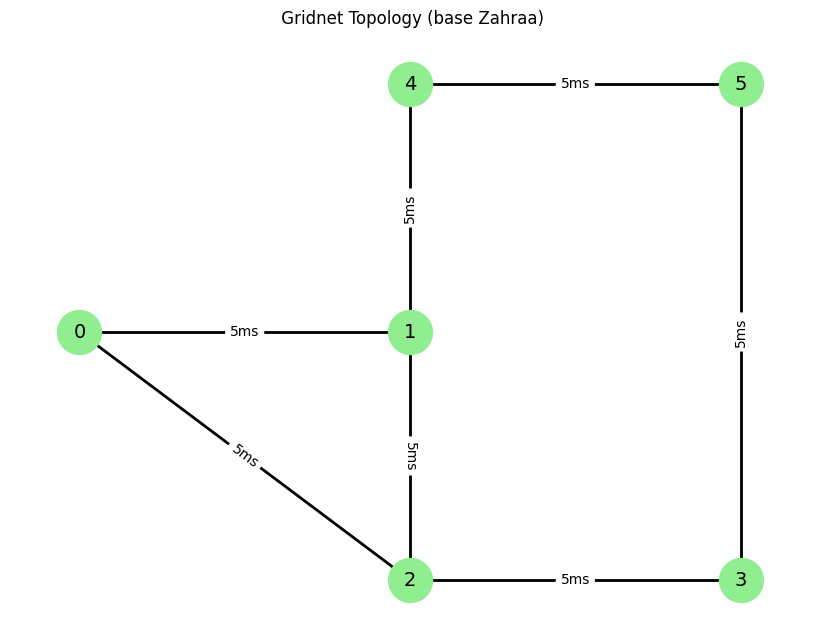

In [9]:
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=14)
nx.draw_networkx_edges(G, pos, width=2)
labels = {(u, v): f"{G[u][v]['delay_ms']}ms" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title(" Gridnet Topology (base Zahraa)")
plt.axis('off')
plt.show()

### Define service types (slices) used in 5G: eMBB, URLLC, mMTC
#### Each slice profile contains:
#### - a service chain (list of functions),
#### - SLA constraints,
#### - and a user density range.

In [ ]:
# Defining slice profiles 
slice_profiles = {
    "eMBB": {
        "functions": ["RAN", "UPF", "DN"],
        "latency_ms": 50,
        "throughput_mbps": 100,
        "users_range": (20, 100)
    },
    "URLLC": {
        "functions": ["RAN", "UPF"],
        "latency_ms": 10,
        "throughput_mbps": 10,
        "users_range": (5, 20)
    },
    "mMTC": {
        "functions": ["RAN", "IoT GW"],
        "latency_ms": 500,
        "throughput_mbps": 0.1,
        "users_range": (100, 300)
    }
}


#### Generate a fixed number of slice requests for simulation.
#### Each slice has a type, a user count (drawn from the range), and its SLA parameters.

In [ ]:

# Generating random slicing
generated_slices = []

for i in range(5): 
    slice_type = random.choice(list(slice_profiles.keys()))
    profile = slice_profiles[slice_type]
    
    slice_id = f"S{i+1}"
    users = random.randint(*profile["users_range"])
    functions = profile["functions"]
    latency = profile["latency_ms"]
    throughput = profile["throughput_mbps"]

    generated_slices.append({
        "Slice ID": slice_id,
        "Type": slice_type,
        "Functions": " → ".join(functions),
        "Users": users,
        "Max Latency (ms)": latency,
        "Min Throughput (Mbps)": throughput
    })

# Showing slices generated 
slice_df = pd.DataFrame(generated_slices)
display(slice_df)

# Generating random slicing
generated_slices = []

for i in range(5): 
    slice_type = random.choice(list(slice_profiles.keys()))
    profile = slice_profiles[slice_type]
    
    slice_id = f"S{i+1}"
    users = random.randint(*profile["users_range"])
    functions = profile["functions"]
    latency = profile["latency_ms"]
    throughput = profile["throughput_mbps"]

    generated_slices.append({
        "Slice ID": slice_id,
        "Type": slice_type,
        "Functions": " → ".join(functions),
        "Users": users,
        "Max Latency (ms)": latency,
        "Min Throughput (Mbps)": throughput
    })

# Showing slices generated 
slice_df = pd.DataFrame(generated_slices)
display(slice_df)


,Slice ID,Type,Functions,Users,Max Latency (ms),Min Throughput (Mbps)
0,S1,eMBB,RAN → UPF → DN,97,50,100.0
1,S2,URLLC,RAN → UPF,13,10,10.0
2,S3,eMBB,RAN → UPF → DN,59,50,100.0
3,S4,mMTC,RAN → IoT GW,203,500,0.1
4,S5,eMBB,RAN → UPF → DN,53,50,100.0


,Slice ID,Type,Functions,Users,Max Latency (ms),Min Throughput (Mbps)
0,S1,eMBB,RAN → UPF → DN,40,50,100.0
1,S2,eMBB,RAN → UPF → DN,48,50,100.0
2,S3,URLLC,RAN → UPF,20,10,10.0
3,S4,eMBB,RAN → UPF → DN,56,50,100.0
4,S5,mMTC,RAN → IoT GW,221,500,0.1


#### Allocate each VNF from the service chain of a slice to a randomly selected node.
#### Nodes lose CPU and memory per allocation; if resources are insufficient, the model may be expanded to reject allocations.


In [ ]:
# Alocating VNF in nodes
# Each function will be alocated in a randon node

vnf_allocations = []     # List to keep allocation 
active_nodes = set()     # Allocation nodes to activation 

for slice_info in generated_slices:
    slice_id = slice_info["Slice ID"]
    users = slice_info["Users"]
    functions = slice_info["Functions"].split(" → ")

    for func in functions:
        # Chose random node
        node = random.choice(list(G.nodes))

        # Update node attributes: reduce CPU and memory (simplified)
        G.nodes[node]["cpu"] -= 10
        G.nodes[node]["mem"] -= 10
        G.nodes[node]["active"] = True

        # Saves allocation
        vnf_allocations.append({
            "Slice": slice_id,
            "Function": func,
            "Node": node,
            "Users": users
        })

        active_nodes.add(node)

# Show nodes
print("Activated nodes:", sorted(active_nodes))

# Show allocations
import pandas as pd
alloc_df = pd.DataFrame(vnf_allocations)
display(alloc_df)


Activated nodes: [2, 3, 4, 5]


,Slice,Function,Node,Users
0,S1,RAN,5,40
1,S1,UPF,3,40
2,S1,DN,5,40
3,S2,RAN,5,48
4,S2,UPF,3,48
5,S2,DN,2,48
6,S3,RAN,4,20
7,S3,UPF,5,20
8,S4,RAN,5,56
9,S4,UPF,3,56


#### Compute end-to-end latency for each slice by calculating the number of hops
#### between the nodes where its VNFs are placed.

In [ ]:
from collections import defaultdict


# Group allocations by slice
slice_node_paths = defaultdict(list)
for entry in vnf_allocations:
    slice_node_paths[entry["Slice"]].append(entry["Node"])

#Calculate latency based on the number of hops between the VNFs' nodes.
latency_estimates = []
for slice_id, nodes in slice_node_paths.items():
    unique_nodes = list(set(nodes))
    total_latency = 0

    if len(unique_nodes) > 1:
        for i in range(len(unique_nodes) - 1):
            try:
                path = nx.shortest_path(G, source=unique_nodes[i], target=unique_nodes[i+1])
                hops = len(path) - 1
                total_latency += hops * 5  # 5 ms por jump
            except nx.NetworkXNoPath:
                total_latency = float('inf')  # impossible path
                break
    else:
        total_latency = 0  # all function in a same node

    latency_estimates.append({
        "Slice": slice_id,
        "Path Nodes": unique_nodes,
        "Estimated Latency (ms)": total_latency
    })

#Show table
latency_df = pd.DataFrame(latency_estimates)
display(latency_df)


,Slice,Path Nodes,Estimated Latency (ms)
0,S1,"[3, 5]",5
1,S2,"[2, 3, 5]",10
2,S3,"[4, 5]",5
3,S4,"[3, 4, 5]",15
4,S5,"[2, 3]",5


#### Each VNF type has an energy profile based on the number of users served.
#### Active infrastructure nodes also incur a fixed energy cost.

In [ ]:
# Power consumption profile
vnf_energy_profiles = {
    "RAN": {"base": 8, "per_user": 0.05},
    "UPF": {"base": 6, "per_user": 0.10},
    "DN": {"base": 4, "per_user": 0.02},
    "IoT GW": {"base": 3, "per_user": 0.01}
}

# Energy in each VNF
energy_consumption = []

for alloc in vnf_allocations:
    func = alloc["Function"]
    users = alloc["Users"]
    node = alloc["Node"]

    base = vnf_energy_profiles[func]["base"]
    per_user = vnf_energy_profiles[func]["per_user"]
    energy = base + per_user * users

    energy_consumption.append({
        "Slice": alloc["Slice"],
        "Function": func,
        "Node": node,
        "Users": users,
        "Energy (W)": round(energy, 2)
    })

energy_df = pd.DataFrame(energy_consumption)
display(energy_df)

# Energy in each node
node_energy_df = pd.DataFrame([
    {"Node": node, "Energy (W)": 100} for node in active_nodes
])
display(node_energy_df)

# Total comsumption of system
total_energy_vnf = energy_df["Energy (W)"].sum()
total_energy_nodes = node_energy_df["Energy (W)"].sum()
total_energy = total_energy_vnf + total_energy_nodes

print(f"Total power: {round(total_energy, 2)} W")


,Slice,Function,Node,Users,Energy (W)
0,S1,RAN,5,40,10.00
1,S1,UPF,3,40,10.00
2,S1,DN,5,40,4.80
3,S2,RAN,5,48,10.40
4,S2,UPF,3,48,10.80
5,S2,DN,2,48,4.96
6,S3,RAN,4,20,9.00
7,S3,UPF,5,20,8.00
8,S4,RAN,5,56,10.80
9,S4,UPF,3,56,11.60


,Node,Energy (W)
0,2,100
1,3,100
2,4,100
3,5,100


Total power: 519.74 W


#### Compare the estimated latency for each slice against its SLA.
#### This step identifies which allocations meet or violate the constraints.


In [ ]:

sla_lookup = {
    s["Slice ID"]: s["Max Latency (ms)"]
    for s in generated_slices
}

sla_results = []
for row in latency_df.itertuples():
    slice_id = row.Slice
    estimated = row._3  # Estimated Latency (ms)
    sla_limit = sla_lookup.get(slice_id, float('inf'))
    sla_ok = estimated <= sla_limit

    sla_results.append({
        "Slice": slice_id,
        "Estimated Latency (ms)": estimated,
        "SLA Limit (ms)": sla_limit,
        "SLA Met?": "Yes" if sla_ok else "No"
    })

sla_verification_df = pd.DataFrame(sla_results)
display(sla_verification_df)


,Slice,Estimated Latency (ms),SLA Limit (ms),SLA Met?
0,S1,5,50,Yes
1,S2,10,50,Yes
2,S3,5,10,Yes
3,S4,15,50,Yes
4,S5,5,500,Yes


In [ ]:

import gym
from gym import spaces
import numpy as np
import networkx as nx
import random

class GridnetEnv(gym.Env):
    def __init__(self, num_nodes=6, num_slices=3):
        super(GridnetEnv, self).__init__()
        self.G = nx.Graph()
        for i in range(num_nodes):
            self.G.add_node(i, cpu=100, mem=100, active=False)
        edges = [(0, 1), (0, 2), (1, 2), (1, 4), (2, 3), (3, 5), (4, 5)]
        for u, v in edges:
            self.G.add_edge(u, v, delay=5)

        self.slice_profiles = {
            "eMBB": ["RAN", "UPF", "DN"],
            "URLLC": ["RAN", "UPF"],
            "mMTC": ["RAN", "IoT GW"]
        }

        self.vnf_energy = {
            "RAN": {"base": 8, "per_user": 0.05},
            "UPF": {"base": 6, "per_user": 0.1},
            "DN": {"base": 4, "per_user": 0.02},
            "IoT GW": {"base": 3, "per_user": 0.01}
        }

        self.num_nodes = num_nodes
        self.num_slices = num_slices
        self.max_vnfs_per_slice = 3
        self.action_space = spaces.Discrete(self.num_nodes)
        self.observation_space = spaces.Box(low=0, high=100, shape=(self.num_nodes + 1,), dtype=np.float32)
        self.reset()

    def reset(self):
        for i in range(self.num_nodes):
            self.G.nodes[i]["cpu"] = 100
            self.G.nodes[i]["mem"] = 100
            self.G.nodes[i]["active"] = False
        self.slices = []
        self.vnf_queue = []
        for i in range(self.num_slices):
            slice_type = random.choice(list(self.slice_profiles.keys()))
            functions = self.slice_profiles[slice_type]
            users = random.randint(20, 100)
            for f in functions:
                self.vnf_queue.append((f, users))
            self.slices.append((slice_type, users))
        self.current_vnf_index = 0
        self.total_energy = 0
        self.slice_allocations = [[] for _ in range(self.num_slices)]
        return self._get_obs()

    def _get_obs(self):
        cpu_vector = [self.G.nodes[i]["cpu"] for i in range(self.num_nodes)]
        return np.array(cpu_vector + [self.current_vnf_index], dtype=np.float32)

    def step(self, action):
        done = False
        reward = 0

        if self.current_vnf_index >= len(self.vnf_queue):
            return self._get_obs(), 0, True, {}

        f, users = self.vnf_queue[self.current_vnf_index]
        node = int(action)

        if self.G.nodes[node]["cpu"] < 10:
            reward = -100
        else:
            self.G.nodes[node]["cpu"] -= 10
            self.G.nodes[node]["active"] = True
            energy = self.vnf_energy[f]["base"] + self.vnf_energy[f]["per_user"] * users
            reward = -energy
            self.total_energy += energy

        slice_idx = self.current_vnf_index // self.max_vnfs_per_slice
        self.slice_allocations[slice_idx].append(node)

        expected_vnfs = len(self.slice_profiles[self.slices[slice_idx][0]])
        if len(self.slice_allocations[slice_idx]) == expected_vnfs:
            nodes = self.slice_allocations[slice_idx]
            latency = 0
            for i in range(len(nodes) - 1):
                src = nodes[i]
                dst = nodes[i + 1]
                try:
                    latency += nx.shortest_path_length(self.G, src, dst, weight="delay")
                except nx.NetworkXNoPath:
                    latency += 999
            SLA_LATENCY_LIMIT = 12
            if latency > SLA_LATENCY_LIMIT:
                reward -= 50

        self.current_vnf_index += 1
        done = self.current_vnf_index >= len(self.vnf_queue)
        return self._get_obs(), reward, done, {}

    def render(self):
        print(f"Total energy: {self.total_energy} W")
        for i in range(self.num_nodes):
            cpu = self.G.nodes[i]["cpu"]
            status = "ON" if self.G.nodes[i]["active"] else "OFF"
            print(f"Node {i}: CPU={cpu}, Status={status}")


# Run a test with random policy
env = GridnetEnv()
obs = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)

env.render()


Total energy: 78.69 W
Node 0: CPU=90, Status=ON
Node 1: CPU=70, Status=ON
Node 2: CPU=100, Status=OFF
Node 3: CPU=70, Status=ON
Node 4: CPU=100, Status=OFF
Node 5: CPU=100, Status=OFF


In [ ]:

from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env


#check_env(GridnetEnv(), warn=True)

# Instaciate environment and model
env = GridnetEnv()
model = PPO("MlpPolicy", env, verbose=1)

# Train model with total number of steps
model.learn(total_timesteps=10000)

# Save model
model.save("ppo_gridnet_test")



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/ceciluz/projects/slicing/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/ceciluz/projects/slicing/.venv/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.1      |
|    ep_rew_mean     | -91.3    |
| time/              |          |
|    fps             | 488      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 7.09       |
|    ep_rew_mean          | -93.5      |
| time/                   |            |
|    fps                  | 409        |
|    iterations           | 2          |
|    time_elapsed         | 10         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01024273 |
|    clip_fraction        | 0.0696     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.00066    |
|    learning_rate        | 0.0003     |
|   

In [ ]:
from stable_baselines3 import PPO

# Recarge model
env = GridnetEnv()
model = PPO.load("ppo_gridnet_test")

# Reset environement to start a new simulation
obs = env.reset()
done = False
total_reward = 0

# Use model to decide allocation
while not done:
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(int(action))
    total_reward += reward

# Show final result
env.render()
print(f"Total reward from PPO agent: {total_reward}")


Total energy: 91.73 W
Node 0: CPU=90, Status=ON
Node 1: CPU=70, Status=ON
Node 2: CPU=80, Status=ON
Node 3: CPU=100, Status=OFF
Node 4: CPU=90, Status=ON
Node 5: CPU=90, Status=ON
Total reward from PPO agent: -141.73


In [ ]:
def evaluate_policy(policy_type="ppo", model=None, episodes=50):
    results = {
        "total_energy": [],
        "sla_violations": []
    }

    for ep in range(episodes):
        env = GridnetEnv()
        obs = env.reset()
        done = False
        slice_idx = 0
        violations = 0

        while not done:
            if policy_type == "ppo" and model is not None:
                action, _ = model.predict(obs)
            else:
                action = env.action_space.sample()

            obs, reward, done, _ = env.step(action)

        # Count SLA violations manually
        for slice_nodes in env.slice_allocations:
            if len(slice_nodes) < 2:
                continue
            latency = 0
            for i in range(len(slice_nodes) - 1):
                try:
                    latency += nx.shortest_path_length(env.G, slice_nodes[i], slice_nodes[i+1], weight="delay")
                except nx.NetworkXNoPath:
                    latency += 999
            if latency > 12:
                violations += 1

        results["total_energy"].append(env.total_energy)
        results["sla_violations"].append(violations)

    return results


In [ ]:
for idx, (stype, users) in enumerate(env.slices):
    nodes = env.slice_allocations[idx]
    functions = env.slice_profiles[stype]
    print(f"Slice {idx} ({stype}, {users} users):")
    for f, n in zip(functions, nodes):
        print(f"  {f} → Node {n}")


Slice 0 (eMBB, 98 users):
  RAN → Node 1
  UPF → Node 5
  DN → Node 2
Slice 1 (eMBB, 76 users):
  RAN → Node 1
  UPF → Node 1
  DN → Node 4
Slice 2 (URLLC, 81 users):
  RAN → Node 2
  UPF → Node 0


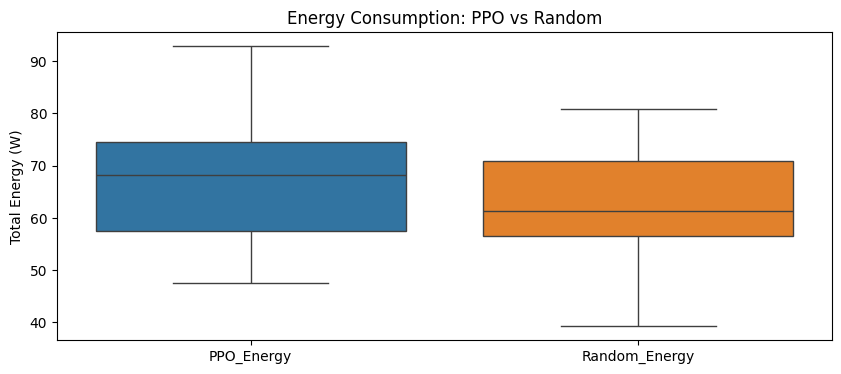

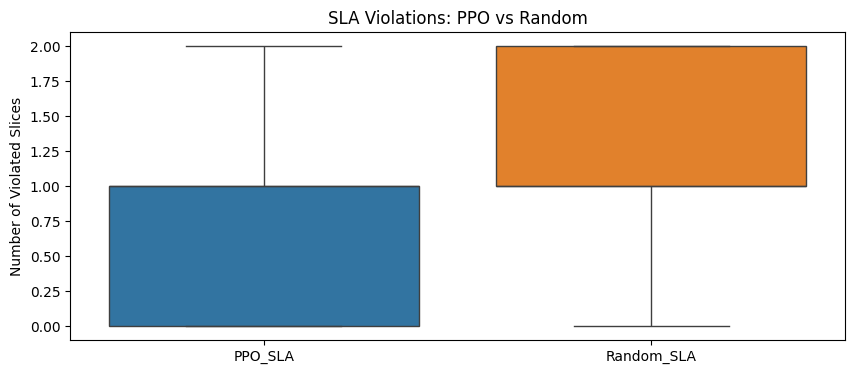

In [ ]:
#  PPO
ppo_results = evaluate_policy(policy_type="ppo", model=model)

# rnadom
random_results = evaluate_policy(policy_type="random")

# Comparation
import pandas as pd
df = pd.DataFrame({
    "PPO_Energy": ppo_results["total_energy"],
    "PPO_SLA": ppo_results["sla_violations"],
    "Random_Energy": random_results["total_energy"],
    "Random_SLA": random_results["sla_violations"]
})

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(data=df[["PPO_Energy", "Random_Energy"]])
plt.title("Energy Consumption: PPO vs Random")
plt.ylabel("Total Energy (W)")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df[["PPO_SLA", "Random_SLA"]])
plt.title("SLA Violations: PPO vs Random")
plt.ylabel("Number of Violated Slices")
plt.show()


In [ ]:
import pandas as pd

# Calcular médias e desvios padrão das métricas
summary = {
    "Metric": ["Total Energy", "SLA Violations"],
    "PPO Mean": [
        df["PPO_Energy"].mean(),
        df["PPO_SLA"].mean()
    ],
    "PPO Std": [
        df["PPO_Energy"].std(),
        df["PPO_SLA"].std()
    ],
    "Random Mean": [
        df["Random_Energy"].mean(),
        df["Random_SLA"].mean()
    ],
    "Random Std": [
        df["Random_Energy"].std(),
        df["Random_SLA"].std()
    ]
}

summary_df = pd.DataFrame(summary)
print("=== Evaluation Summary ===")
print(f"Total Energy - PPO:    {df['PPO_Energy'].mean():.2f} ± {df['PPO_Energy'].std():.2f}")
print(f"Total Energy - Random: {df['Random_Energy'].mean():.2f} ± {df['Random_Energy'].std():.2f}")
print(f"SLA Violations - PPO:    {df['PPO_SLA'].mean():.2f} ± {df['PPO_SLA'].std():.2f}")
print(f"SLA Violations - Random: {df['Random_SLA'].mean():.2f} ± {df['Random_SLA'].std():.2f}")
summary_df



=== Evaluation Summary ===
Total Energy - PPO:    66.30 ± 10.55
Total Energy - Random: 63.25 ± 9.96
SLA Violations - PPO:    0.86 ± 0.70
SLA Violations - Random: 1.16 ± 0.68


,Metric,PPO Mean,PPO Std,Random Mean,Random Std
0,Total Energy,66.3042,10.550211,63.2484,9.962654
1,SLA Violations,0.8600,0.700146,1.1600,0.680936
